In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as ndimage
import os,sys
import os.path as osp

In [4]:
# Nov 29 calculate iou score
prop_mask = r'/playpen1/qiuyang/refined_segmentation/Nov_4_propagation_try1/Nov_29_binary_masks_npy*300/F%05d.npy'
scribb_mask = r'/playpen1/qiuyang/refined_segmentation/Teli_9_undistort/Teli_9_img_npy_mask/F%05d.npy'
iou_arr = []
with open("output.txt", "w") as text_file:
    for fn in range(0,300):
        if fn==1:
            iou_arr.append(0)
            text_file.write("F%05d iou: %f no score\n" %(fn,0))
            continue

        prop_npy = np.load(prop_mask%fn)
        scribb_npy = np.load(scribb_mask%fn)
        intersection = np.logical_and(prop_npy, scribb_npy )
        union = np.logical_or(prop_npy, scribb_npy)
        iou_score = np.sum(intersection) / np.sum(union)
        iou_arr.append(iou_score)
        text_file.write("F%05d iou: %f\n" %(fn,iou_score))

In [9]:
iou_order = np.argsort(iou_arr)
n = 10
n_Smallest = iou_order[:100]
n_Largest = iou_order[::-1][:50]
print(n_Smallest)
print(n_Largest)

[  1 212 211 210 209 208 213 207 216 222 217 218 215 214 223 221 205 206
 220 219 224 225 204 203 226 227 228 202 229 201 230 235 231 237 232 233
 236 200 198 234 199 243 238 197 239 241 196 244 240 195 242 193 194 247
 245 192 246 251 248 252 190 250 191 188 189 249 253 254 186 187 185 256
  89 259 257 265 263 260 264 183 255  86 261 181 258  90  88 262 184 182
  91  87 179 267 178 268 266 284 285 286]
[ 2  7  8  9  5  0  4 10 11  3 12 13 16 17 15 18 21 20 19 14 22 27 24 26
 25 23 29 28 30 37 32 36 34 35 31 33 38 42 41 40 43 39 45 46 47 44 49 48
 52 50]


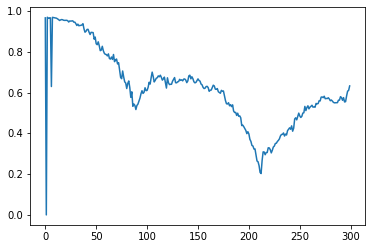

In [7]:
plt.plot(np.arange(0,300), iou_arr)